# Single-image YOLO probe
Load the TrapperAI model and run it on one image. Set `image_path` below to your file.


In [3]:
from pathlib import Path
import cv2
import numpy as np
import torch
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
import matplotlib.pyplot as plt

MODEL_REPO = "OSCF/TrapperAI-v02.2024"
MODEL_FILENAME = "TrapperAI-v02.2024-YOLOv8-m.pt"
device = "mps" if torch.backends.mps.is_available() else "cpu"
print("device:", device)


Matplotlib is building the font cache; this may take a moment.


device: mps


In [4]:
_MODEL = None

def ensure_model_path() -> str:
    local = Path(MODEL_FILENAME)
    return str(local) if local.exists() else hf_hub_download(repo_id=MODEL_REPO, filename=MODEL_FILENAME)

def load_model():
    global _MODEL
    if _MODEL is None:
        _MODEL = YOLO(ensure_model_path()).to(device)
    return _MODEL

def load_image(path: Path):
    img = cv2.imread(str(path))
    if img is None:
        raise FileNotFoundError(f"Could not read image {path}")
    return img


In [41]:
# Set this to the image you want to inspect
image_path = Path("images/VD_00472_frame_4.jpg")
image_path

PosixPath('images/VD_00472_frame_4.jpg')

detections: 4
Gray Wolf: conf=0.600, box=[587.1910400390625, 521.7183837890625, 764.0784912109375, 1024.751953125]
Fallow Deer: conf=0.567, box=[586.9771118164062, 521.68359375, 764.3290405273438, 1024.283447265625]
Fallow Deer: conf=0.537, box=[1740.5645751953125, 710.7514038085938, 1972.6656494140625, 991.295166015625]
Gray Wolf: conf=0.453, box=[0.0, 698.2222290039062, 118.79334259033203, 887.9578247070312]


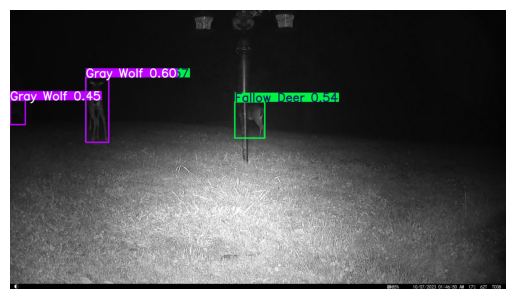

In [42]:
model = load_model()
img = load_image(image_path)
results = model.predict(img, device=device, verbose=False)
res = results[0]
print(f"detections: {len(res.boxes)}")
for box in res.boxes:
    cls_idx = int(box.cls.item())
    label = res.names[cls_idx]
    conf = float(box.conf.item())
    xyxy = box.xyxy.cpu().numpy().tolist()[0]
    print(f"{label}: conf={conf:.3f}, box={xyxy}")

# Visualize
vis = res.plot()
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
